In [1]:
from funcs.notebook import *

from altaipony.lcio import from_mast

path = "/home/ekaterina/Documents/002_writing/flaring-spi-draft/flaring-spi-draft/figures"

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [128]:

lc = from_mast("TIC 299798795",mission="TESS", c=13,cadence="short")

Found cached file /home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2019169103026-s0013-0000000299798795-0146-s/tess2019169103026-s0013-0000000299798795-0146-s_lc.fits with expected size 2079360.
4% (896/20479) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4% (896/20479) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [129]:
flcc = custom_detrending(lc)

0.009333999999995513 3.042921000000007 1.450335999999993 1.630172000000016 1.5435620000000085 1.5484519999999975 9.224777000000017


In [130]:
w = np.floor(1. / 12. / np.nanmin(np.diff(flcc.time)))
if w%2==0: 
    w+=1

# use window to estimate the noise in the LC
df = estimate_detrended_noise(flcc, std_window=int(w), mask_pos_outliers_sigma=2.5)

# search the residual for flares
ff = df.find_flares(addtail=True).flares

Found 8 candidate(s) in the (0,9768) gap.
Found 8 candidate(s) in the (9768,19581) gap.


In [131]:
ff

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,7,11,307062,307066,1653.932075,1653.937630,7.077870,0.469892,0.023964,0.005556,19581.0
1,593,598,307657,307662,1654.758474,1654.765418,7.896705,0.695078,0.018941,0.006945,19581.0
2,2219,2230,309288,309299,1657.023780,1657.039058,22.069879,1.036223,0.041086,0.015278,19581.0
3,4072,4084,311189,311201,1659.664088,1659.680755,23.730216,0.870759,0.039808,0.016667,19581.0
4,7039,7060,314178,314199,1663.815517,1663.844684,46.885995,1.141950,0.055258,0.029167,19581.0
5,7562,7568,314716,314722,1664.562745,1664.571079,6.197932,0.663580,0.013458,0.008333,19581.0
6,8417,8421,315618,315622,1665.815532,1665.821088,5.178831,0.518372,0.015574,0.005556,19581.0
7,9034,9096,316235,316297,1666.672482,1666.758594,353.233094,1.713675,0.118320,0.086112,19581.0
8,9799,9802,317674,317677,1668.671103,1668.675270,2.939387,0.413053,0.011627,0.004167,19581.0
9,14289,14294,322213,322218,1674.975296,1674.982241,6.903584,0.630433,0.019214,0.006944,19581.0


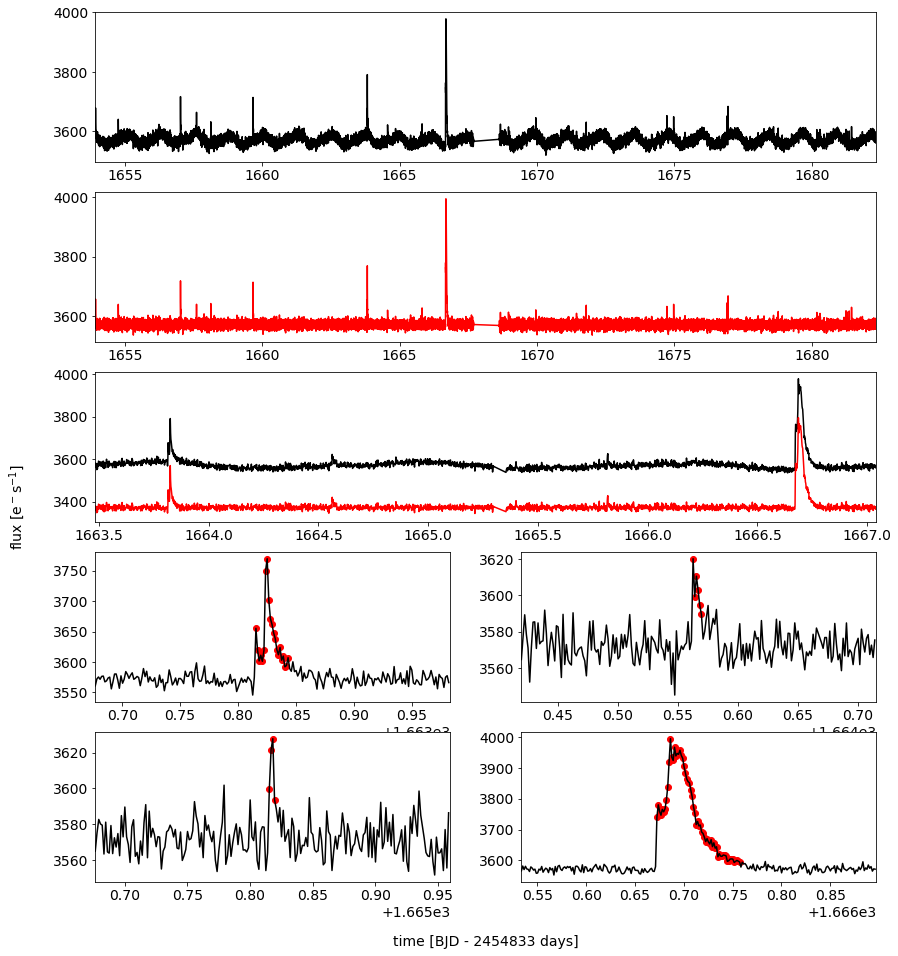

In [132]:
%matplotlib inline
fig = plt.figure(figsize=(14,16))

ax = fig.add_subplot(5,2,(1,2))
ax.plot(lc.time, lc.flux, c="k")
ax.set_xlim(flcc.time[0], flcc.time[-1])

ax = fig.add_subplot(5,2,(3,4))
ax.plot(flcc.time, flcc.detrended_flux, c="r")
ax.set_xlim(flcc.time[0], flcc.time[-1])

ax = fig.add_subplot(5,2,(5,6))
ax.plot(lc.time, lc.flux, c="k")
ax.plot(flcc.time, flcc.detrended_flux -200, c="r")
ax.set_xlim(flcc.time[6800], flcc.time[9300])

#ax[1].plot(flcc.time, flcc.detrended_flux, c="r",zorder=-10)
# ax.set_xlim(flcc.time[6800], flcc.time[9300])
# plt.tight_layout()
# plt.xlabel('time [BJD - 2457000 days]',fontsize=14)
x=0
off =100
for i, r in ff.iloc[4:8].iterrows():
    ax = fig.add_subplot(5,2,7+x)
    s,f = r.istart, r.istop 
    
    ax.scatter(flcc.time[s:f],flcc.detrended_flux[s:f],c="r")
    ax.plot(flcc.time[s-off:f+off],flcc.detrended_flux[s-off:f+off],c="k")
    ax.set_xlim(flcc.time[s-off], flcc.time[f+off])
    x +=1

    
# Axis labels    
ax = fig.add_subplot(5,2,(9,10))

ax.text(0.5, -.4, 'time [BJD - 2454833 days]',
        fontsize=14, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes)
ax.text(-.1, 2.5, r"flux [e$^-$s$^{-1}$]",
        fontsize=14, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes, 
        rotation="vertical")
ax.axis("off")
# --------------------------------------    
    
plt.xlabel('time [BJD - 2457000 days]',fontsize=14)
plt.savefig(f"{path}/illustrate_flares.png",dpi=300)

# More for the Appendix

In [105]:

lc = from_mast("Kepler-1651",mission="Kepler", c=14,cadence="short")
lc

19% (8480/45330) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
19% (8480/45330) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (106/44280) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (106/44280) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


[FlareLightCurve(ID: 10905746),
 FlareLightCurve(ID: 10905746),
 FlareLightCurve(ID: 10905746)]

In [106]:
lc=lc[0]

In [107]:
flcc = custom_detrending(lc)

0.015422000000000935 19.528076 2.6239439999999945 2.552267999999998 2.5474570000000085 2.574816999999996 29.841983999999997


In [109]:
w = np.floor(1. / 12. / np.nanmin(np.diff(flcc.time)))
if w%2==0: 
    w+=1

# use window to estimate the noise in the LC
df = estimate_detrended_noise(flcc, std_window=int(w), mask_pos_outliers_sigma=2.5)

# search the residual for flares
ff = df.find_flares(addtail=True).flares

Found 6 candidate(s) in the (0,22221) gap.
Found 1 candidate(s) in the (22221,34812) gap.


(0.0, 1.0, 0.0, 1.0)

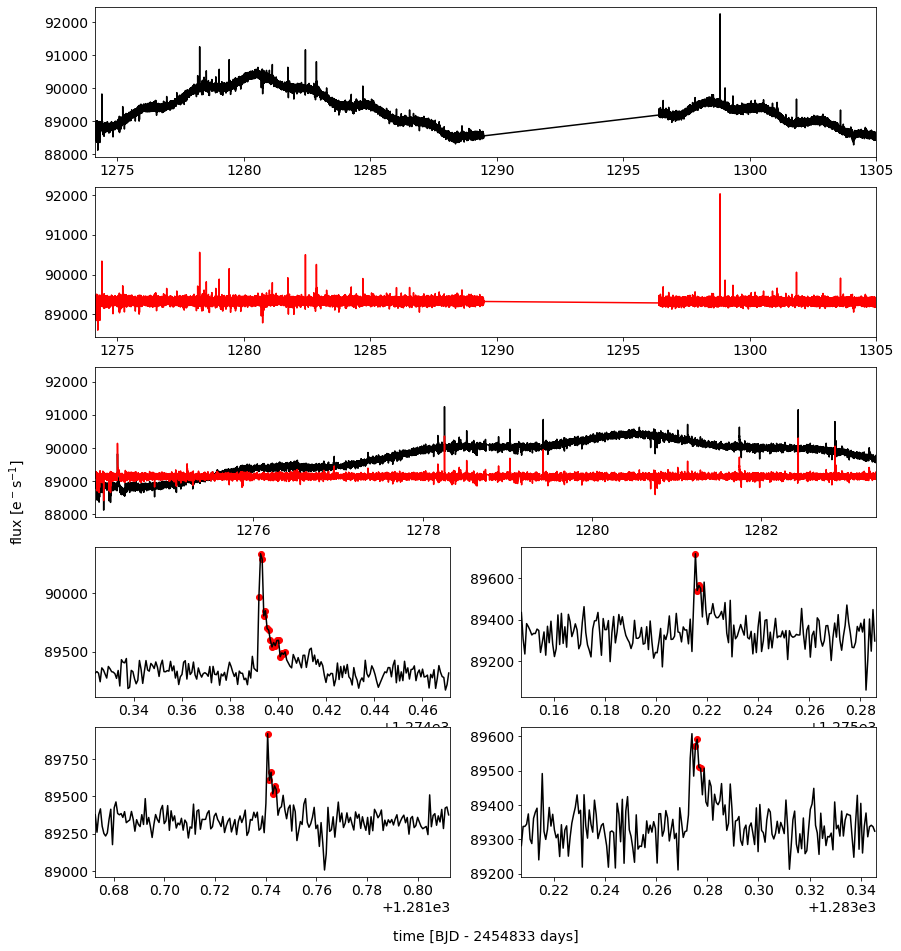

In [126]:
%matplotlib inline
fig = plt.figure(figsize=(14,16))

ax = fig.add_subplot(5,2,(1,2))
ax.plot(lc.time, lc.flux, c="k")
ax.set_xlim(flcc.time[0], flcc.time[-1])

ax = fig.add_subplot(5,2,(3,4))
ax.plot(flcc.time, flcc.detrended_flux, c="r")
ax.set_xlim(flcc.time[0], flcc.time[-1])

ax = fig.add_subplot(5,2,(5,6))
ax.plot(lc.time, lc.flux, c="k")
ax.plot(flcc.time, flcc.detrended_flux -200, c="r")
ax.set_xlim(flcc.time[0], flcc.time[13300])

#ax[1].plot(flcc.time, flcc.detrended_flux, c="r",zorder=-10)
# ax.set_xlim(flcc.time[6800], flcc.time[9300])
# plt.tight_layout()
# plt.xlabel('time [BJD - 2457000 days]',fontsize=14)
x=0
off =100
for i, r in ff.iloc[:4].iterrows():
    ax = fig.add_subplot(5,2,7+x)
    s,f = r.istart, r.istop 
    
    ax.scatter(flcc.time[s:f],flcc.detrended_flux[s:f],c="r")
    ax.plot(flcc.time[s-off:f+off],flcc.detrended_flux[s-off:f+off],c="k")
    ax.set_xlim(flcc.time[s-off], flcc.time[f+off])
    x +=1
# for a in ax:
#     a.set_ylabel(r"flux [e$^-$s$^{-1}$]",fontsize=14);
# ax[1].set_ylim(3550,3650)
ax = fig.add_subplot(5,2,(9,10))

ax.text(0.5,-.4,'time [BJD - 2454833 days]',fontsize=14, horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes)
ax.text(-.1,2.5,r"flux [e$^-$s$^{-1}$]",fontsize=14, horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes, rotation="vertical")
ax.axis("off")
# plt.savefig(f"{path}/illustrate_flares.png",dpi=300)

In [ ]:
4000/3600, 